Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. 

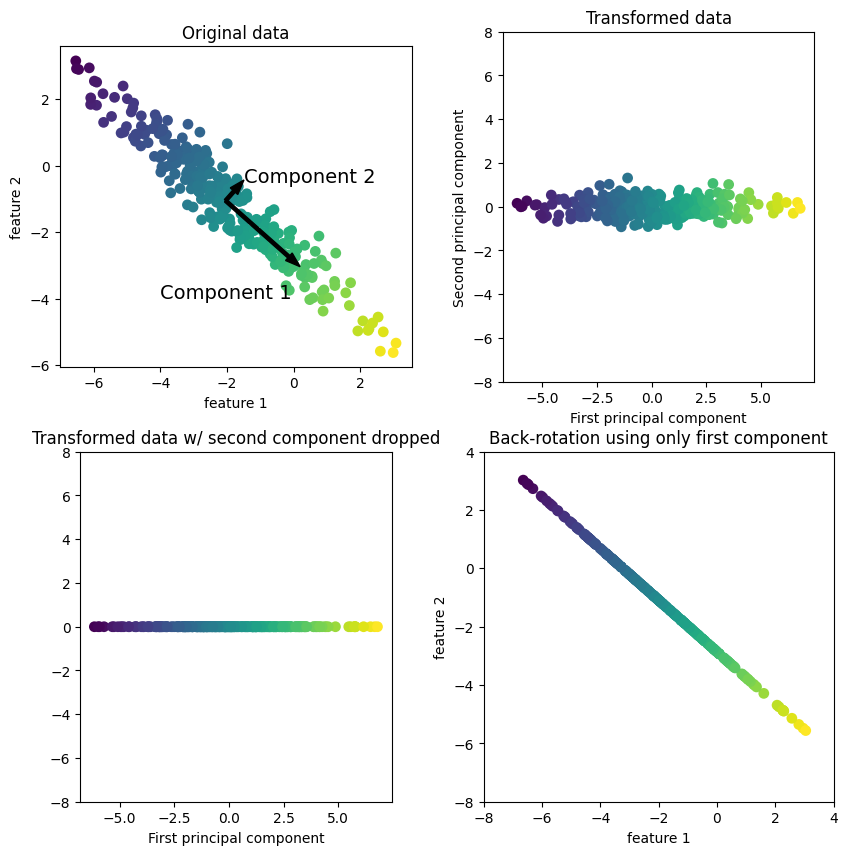

In [1]:
import mglearn

mglearn.plots.plot_pca_illustration()

The first plot (top left) shows the original data points, colored to distinguish among them. The algorithm proceeds by first finding the direction of maximum variance, labeled “Component 1.” This is the direction (or vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other. Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle) to the first direction. In two dimensions, there is only one possible orientation that is at a right angle, but in higher-dimensional spaces there would be (infinitely) many orthogonal directions. Although the two components are drawn as arrows, it doesn’t really matter where the head and the tail are; we could have drawn the first component from the center up to the top left instead of down to the bottom right. The directions found using this process are called **principal components**, as they are the main directions of variance in the data. In general, there are as many principal components as original features.

The second plot (top right) shows the same data, but now rotated so that the first principal component aligns with the x-axis and the second principal component aligns with the y-axis. Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero. In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal.

##### Applying PCA to the cancer dataset for visualization

One of the most common applications of PCA is visualizing high-dimensional data‐ sets. As we saw in Supervised Chapter, it is hard to create scatter plots of data that has more than two features. For the Iris dataset, we were able to create a pair plot that gave us a partial picture of the data by showing us all the possible combinations of two features. But if we want to look at the Breast Cancer dataset, even using a pair plot is tricky. This dataset has 30 features, which would result in 30 * 14 = 420 scatter plots

In [2]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

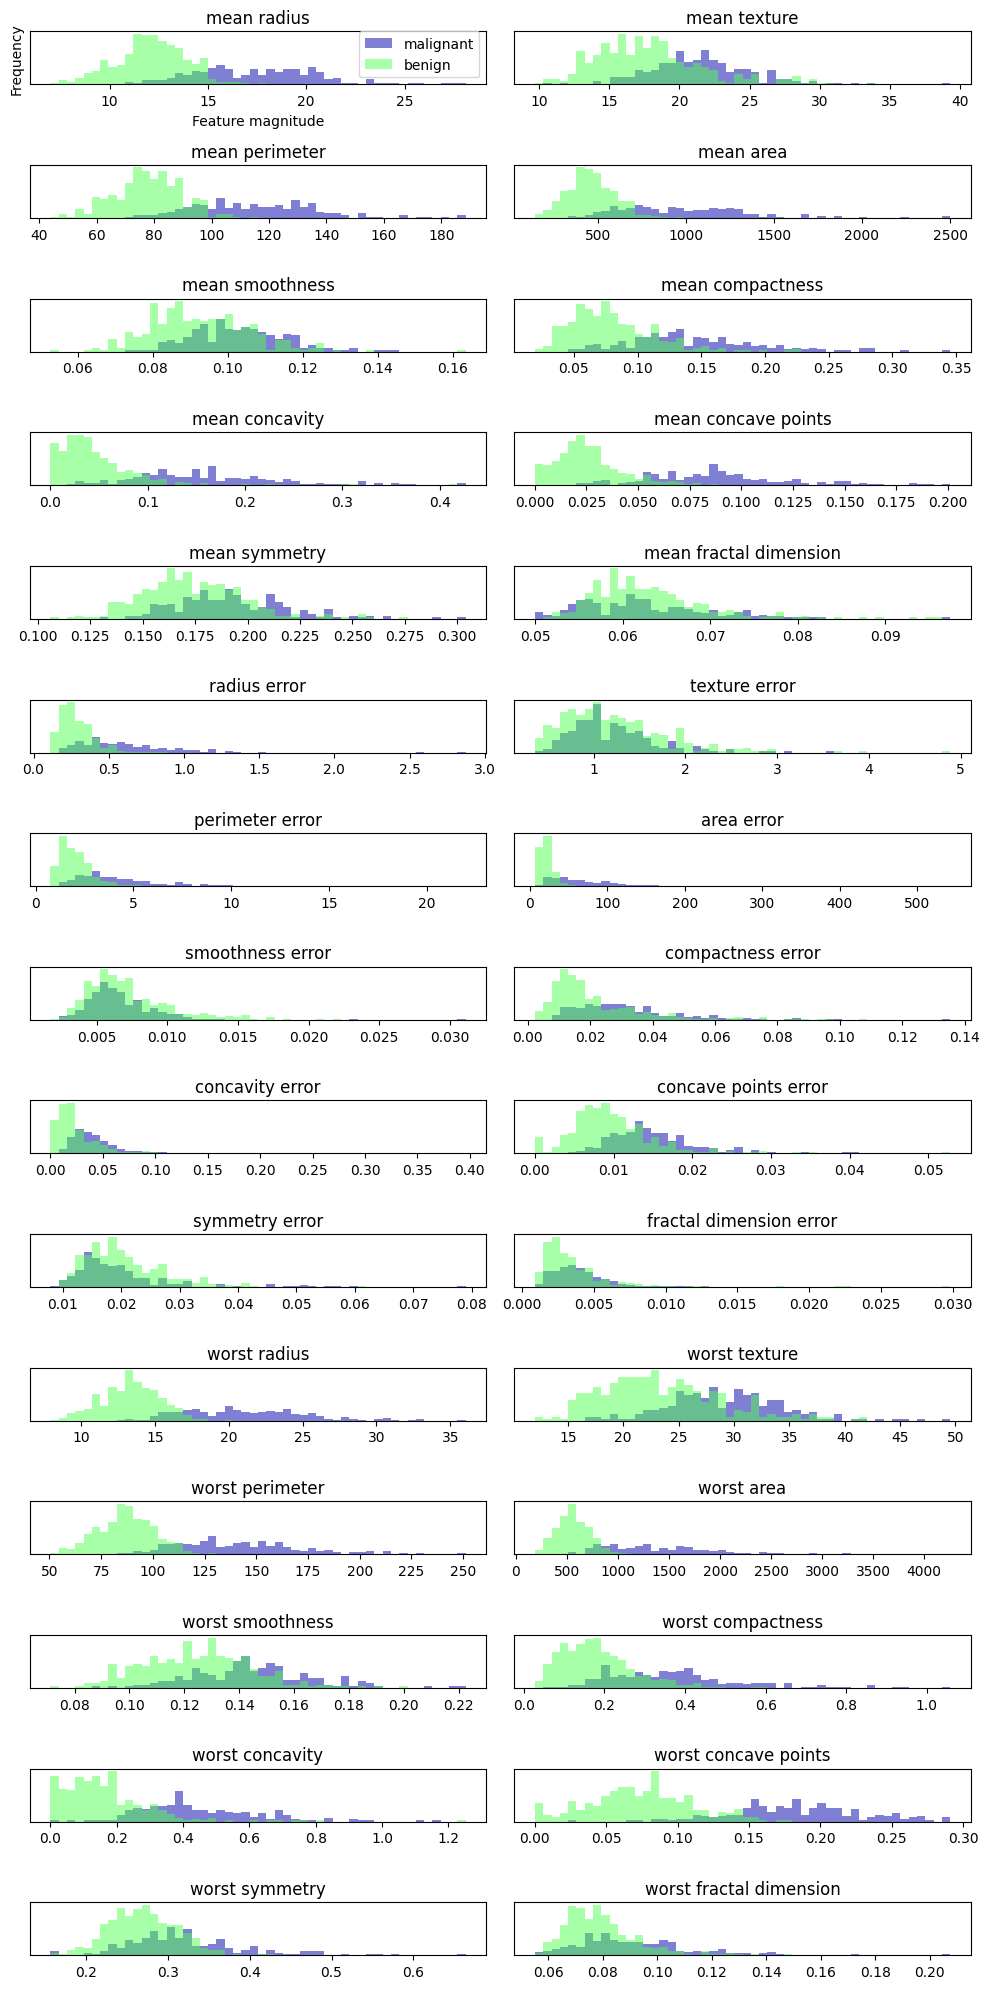

In [3]:
fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc="best")
    fig.tight_layout()

Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range Each plot overlays two histograms, one for all of the points in the benign class (green) and one for all the points in the malignant class (blue).

However, this plot doesn’t show us anything about the interactions between variables and how these relate to the classes. Using PCA, we can capture the main interactions and get a slightly more complete picture. We can find the first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot.

Before we apply PCA, we scale our data so that each feature has unit variance using
<code>StandardScaler</code>

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Applying PCA:

In [5]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components = 2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


We can now plot the first two principal components

Text(0, 0.5, 'Second principal component')

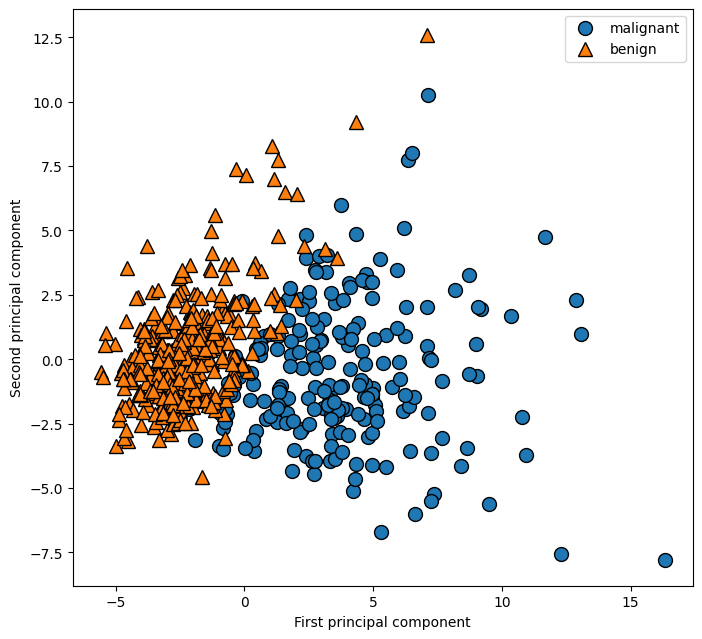

In [6]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points. You can see that the two classes separate quite well in this two-dimensional space. This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes. We can also see that the malignant (red) points are more spread out than the benign (blue) points

In [7]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in components_ corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.). The columns correspond to the original features attribute of the PCA in this example, “mean radius,” “mean texture,” and so on. Let’s have a look at the content of components_

In [8]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map

Text(0, 0.5, 'Principal components')

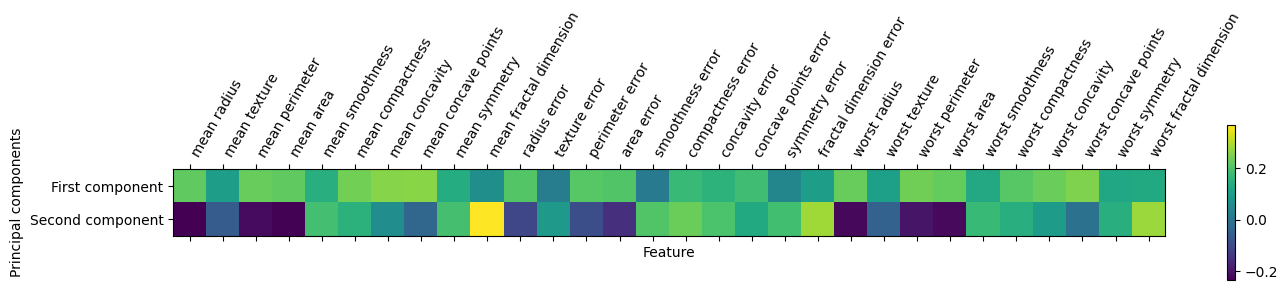

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

You can see that in the first component, all features have the same sign (it’s positive, but as we mentioned earlier, it doesn’t matter which direction the arrow points in).

That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. The second component has mixed signs, and both of the components involve all of the 30 features.

##### Eigenfaces for feature extraction

One of the most famous applications of PCA is Eigenfaces. Using PCA for feature extraction, we can find a lower-dimensional representation of the face images. This might be useful if you want to build a face recognition system, and it can also be a fun way to see the power of PCA. The idea is to find the principal components that capture the most important features of the data, and then use these to reconstruct the data with a lower dimension, as shown in the following figure.

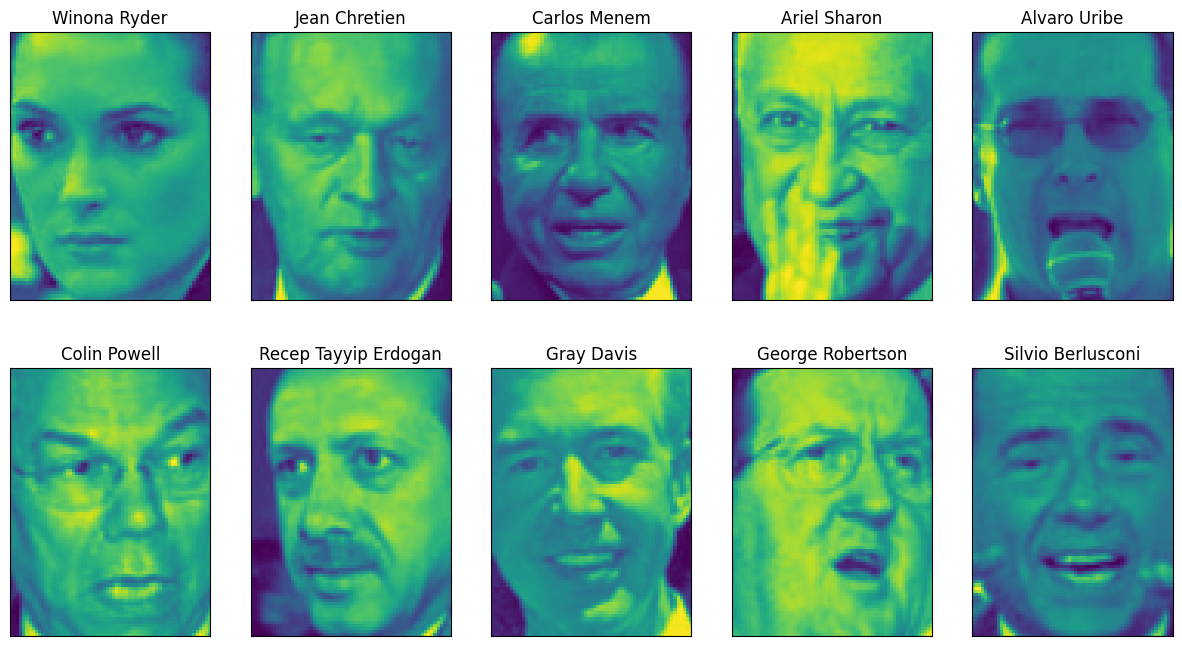

In [10]:
from sklearn.datasets import fetch_lfw_people


people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [11]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


There are 3,023 images, each 87×65 pixels large, belonging to 62 different people

The dataset is a bit skewed, however, containing a lot of images of George W. Bush
and Colin Powell, as you can see here

In [12]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush)

In [13]:
mask = np.zeros(people.target.shape)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask == 1]
y_people = people.target[mask == 1]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database. This has applications in photo collection, social media, and security applications. One way to solve this problem would be to build a classifier where each person is a separate class. However, there are usually many different people in face databases, and very few images of the same person (i.e., very few training examples per class). That makes it hard to train most classifiers. 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.22


We obtain the first 50 picture with the accuracy of 0.22, which is not actually that bad for a 62-class classification problem.

So this is where PCA comes in. PCA helps measure facial features by rescaling principal components to have the same scale as StandardScaler. This is a significant improvement over traditional pixel distances, which are used to compare grayscale values between images. By enabling the whitening option, the accuracy of facial features can be improved, as the data is rescaled to a circle instead of an ellipse, resulting in a more accurate representation.

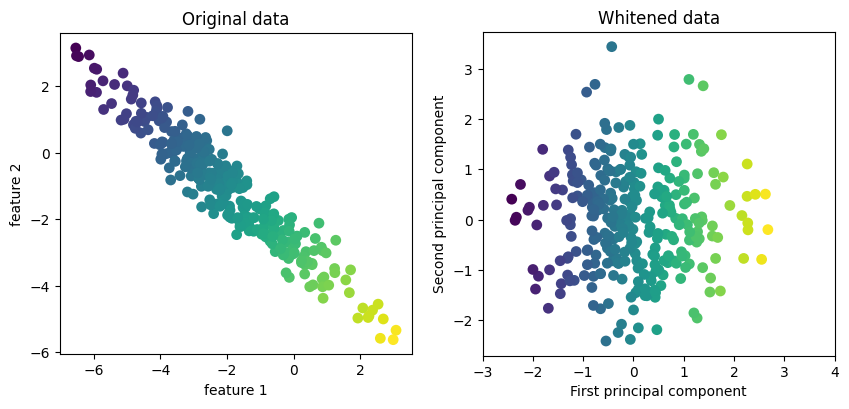

In [15]:
mglearn.plots.plot_pca_whitening()

We fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data

In [16]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


The new data has 100 features, the first 100 principal components. Now, we can use the new representation to classify our images using a one-nearest-neighbors classifier:

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.30


Our accuracy improved quite significantly, from 0.22 to 0.30, confirming our
intuition that the principal components might provide a better representation of the
data.

For image data, we can also easily visualize the principal components that are found. Remember that components correspond to directions in the input space. The input space here is 50×37-pixel grayscale images, so directions within this space are also 50×37-pixel grayscale images.

In [18]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


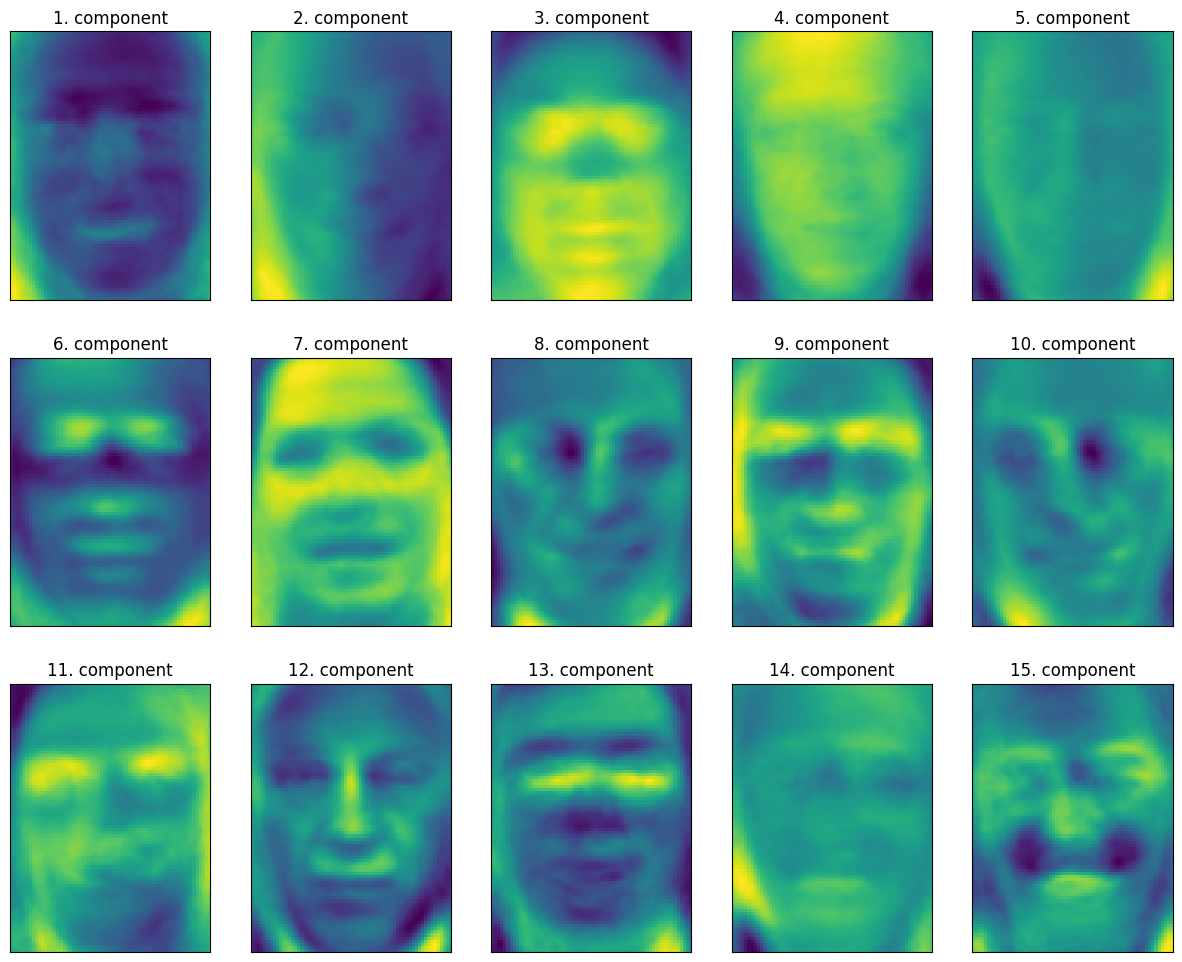

In [19]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

The PCA model captures face images through components like contrast, lighting, and alignment. While this representation is semantic, it's far from human perception. Humans tend to use attributes like age, gender, facial expression, and hair style when assessing similarity, which are hard to infer from pixel intensities. Therefore, algorithms often interpret visual data differently from human perception, making it crucial to consider human perception when evaluating face similarity.

We can try to use PCA to visualize all the faces in the dataset in a scatter plot
using the first two principal components, with classes given by who is shown in the image, similarly

Text(0, 0.5, 'Second principal component')

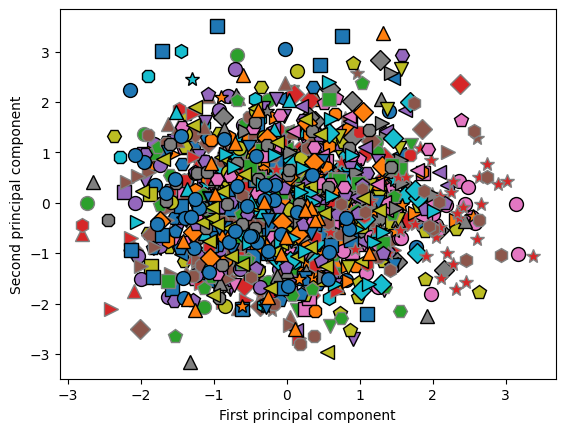

In [23]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

As you can see, when we use only the first two principal components the whole data is just a big blob, with no separation of classes visible. This is not very surprising,
given that even with 10 components, PCA only captures very rough characteristics of the faces.